# 2º Semana

Como na primeira semana eu separei e organizei os dados conforme notebook: [1º Semana](https://github.com/Dev-Zz/alura_challenge/blob/main/Alura%20Challenge/Alura%20Challenge%20Semana%201.ipynb), irei esses dados para próximos trabalhos.

## Leitura do arquivo da 1º Semana

In [20]:
import pandas as pd
dataset = pd.read_csv(r'C:\Users\Jose Eduardo\Documents\GitHub\alura_challenge\alura_challenge_1_semana.csv')

In [21]:
dataset.head(3)

,Identificação do Cliente,Churn,Sexo,Idoso,Casado,Dependentes,Meses de Contrato,Serviço Telefônico,Serviço de Internet,Multiplas Linhas,...,Proteção Dispositivo,Suporte Técnico,TV a Cabo,Stremaming Filmes,Tipo do Contrato,Total Gasto Diário,Fatura Online,Forma de Pagamento,Total Gasto Mensal,Total Gasto Anual
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Um ano,2.186667,Sim,Cheque,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mês a mês,1.996667,Não,Cheque,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mês a mês,2.463333,Sim,Cheque eletrônico,73.9,280.85


## Analisar a variável target: Churn

Nos foi passado que devemos analisar a variável Churn, para isso usarei o **.describe()**

In [22]:
dataset.describe()

,Meses de Contrato,Total Gasto Diário,Total Gasto Mensal,Total Gasto Anual
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2.158723,64.761692,2279.798992
std,24.559481,1.003002,30.090047,2266.730170
min,0.000000,0.608333,18.250000,18.800000
25%,9.000000,1.183333,35.500000,398.550000
50%,29.000000,2.345000,70.350000,1394.550000
75%,55.000000,2.995000,89.850000,3786.600000
max,72.000000,3.958333,118.750000,8684.800000


In [23]:
dataset.describe(include=[object])

,Identificação do Cliente,Churn,Sexo,Idoso,Casado,Dependentes,Serviço Telefônico,Serviço de Internet,Multiplas Linhas,Tipo de Internet,Backup Online,Proteção Dispositivo,Suporte Técnico,TV a Cabo,Stremaming Filmes,Tipo do Contrato,Fatura Online,Forma de Pagamento
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,Não,Masculino,Não,Não,Não,Sim,Não,Fibra ótica,Não,Não,Não,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico
freq,1,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [32]:
churn = pd.merge(
    left = dataset['Churn'].value_counts(sort = False),
    right = dataset['Churn'].value_counts(normalize=True, sort = False),
    left_index = True,
    right_index = True
)

churn.rename(columns={
    'Churn_x': 'Frequências',
    'Churn_y': 'Percentual'}, inplace = True)

churn.rename_axis('Churn', inplace = True)
churn

,Frequências,Percentual
Churn,,
Não,5174,0.73463
Sim,1869,0.26537


In [31]:
churn.style.format({'Percentual': '{:.2%}'})

,Frequências,Percentual
Churn,,
Não,5174,73.46%
Sim,1869,26.54%


C:\Users\Jose Eduardo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



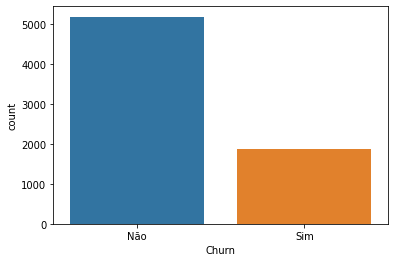

In [51]:
import seaborn as sns
ax = sns.countplot(dataset['Churn'])